PROJET N°7-1 : EXPLORATION
==========================

***Implémentez un modèle de scoring***

**Auteur:** *Jean EMIDIO*

**But**

- Vous êtes Data Scientist au sein d'une société financière, nommée "Prêt à dépenser", qui propose des crédits à la consommation pour des personnes ayant peu ou pas du tout d'historique de prêt.

- L’entreprise souhaite mettre en œuvre un outil de “scoring crédit” pour calculer la probabilité qu’un client rembourse son crédit, puis classifie la demande en crédit accordé ou refusé. Elle souhaite donc développer un algorithme de classification en s’appuyant sur des sources de données variées (données comportementales, données provenant d'autres institutions financières, etc.)

**Mission 1**

- Construire un modèle de scoring qui donnera une prédiction sur la probabilité de faillite d'un client de façon automatique.
- Analyser les features qui contribuent le plus au modèle, d’une manière générale (feature importance globale) et au niveau d’un client (feature importance locale), afin, dans un soucis de transparence, de permettre à un chargé d’études de mieux comprendre le score attribué par le modèle.
- Mettre en production le modèle de scoring de prédiction à l’aide d’une API et réaliser une interface de test de cette API.
- Mettre en œuvre une approche globale MLOps de bout en bout, du tracking des expérimentations à l’analyse en production du data drift.

**Mission 2**

Afin de pouvoir faire évoluer régulièrement le modèle, je souhaite tester la mise en œuvre une démarche de type MLOps d’automatisation et d’industrialisation de la gestion du cycle de vie du modèle. 

Vous trouverez en pièce jointe la liste d’outils à utiliser pour créer une plateforme MLOps qui s’appuie sur des outils Open Source. 

Je souhaite que vous puissiez mettre en oeuvre au minimum les étapes orientées MLOps suivantes : 

- Dans le notebook d’entraînement des modèles, générer à l’aide de MLFlow un tracking d'expérimentations
- Lancer l’interface web 'UI MLFlow" d'affichage des résultats du tracking
- Réaliser avec MLFlow un stockage centralisé des modèles dans un “model registry”
- Tester le serving MLFlow
- Gérer le code avec le logiciel de version Git
- Partager le code sur Github pour assurer une intégration continue
- Utiliser Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Concevoir des tests unitaires avec Pytest (ou Unittest) et les exécuter de manière automatisée lors du build réalisé par Github Actions
 
J’ai également rassemblé des conseils pour vous aider à vous lancer dans ce projet !

Concernant l’élaboration du modèle soyez vigilant sur deux points spécifiques au contexte métier : 
- Le déséquilibre entre le nombre de bons et de moins bons clients doit être pris en compte pour élaborer un modèle pertinent, avec une méthode au choix
- Le déséquilibre du coût métier entre un faux négatif (FN - mauvais client prédit bon client : donc crédit accordé et perte en capital) et un faux positif (FP - bon client prédit mauvais : donc refus crédit et manque à gagner en marge)
Vous pourrez supposer, par exemple, que le coût d’un FN est dix fois supérieur au coût d’un FP
Vous créerez un score “métier” (minimisation du coût d’erreur de prédiction des FN et FP) pour comparer les modèles, afin de choisir le meilleur modèle et ses meilleurs hyperparamètres. Attention cette minimisation du coût métier doit passer par l’optimisation du seuil qui détermine, à partir d’une probabilité, la classe 0 ou 1 (un “predict” suppose un seuil à 0.5 qui n’est pas forcément l’optimum)
En parallèle, maintenez pour comparaison et contrôle des mesures plus techniques, telles que l’AUC et l’accuracy 

D’autre part je souhaite que vous mettiez en œuvre une démarche d’élaboration des modèles avec Cross-Validation et optimisation des hyperparamètres, via GridsearchCV ou équivalent.

Un dernier conseil : si vous obtenez des scores supérieurs au 1er du challenge Kaggle (AUC > 0.82), posez-vous la question si vous n’avez pas de l’overfitting dans votre modèle !

Vous exposerez votre modèle de prédiction sous forme d’une API qui permet de calculer la probabilité de défaut du client, ainsi que sa classe (accepté ou refusé) en fonction du seuil optimisé d’un point de vue métier.

Le déploiement de l’API sera réalisée sur une plateforme Cloud, de préférence une solution gratuite.

Je vous propose d’utiliser un Notebook ou une application Streamlit pour réaliser en local  l’interface de test de l’API.

**Outils Open Source pour élaborer une plateforme MLOps**

- MLFlow pour la gestion “d’expériences” et leur tracking lors de la phase d’entraînement des modèles, ainsi que la visualisation des résultats avec MLFlow UI
- MLFlow pour le stockage centralisé des modèles dans un “model registry” et le serving
- Git, logiciel de version de code, pour suivre les modifications du code final de l’API de prédiction à déployer
- Github pour stocker et partager sur le cloud le code de l’API, alimenté par un “push” Git et ainsi assurer une intégration continue
- Github Actions pour le déploiement continu et automatisé du code de l’API sur le cloud
- Pytest (ou Unittest) pour concevoir les tests unitaires et les exécuter de manière automatisée lors du build réalisé par Github

**Objectifs pédagogiques**

- Définir et mettre en œuvre un pipeline d’entraînement des modèles
- Définir la stratégie d’élaboration d’un modèle d’apprentissage supervisé
- Évaluer les performances des modèles d’apprentissage supervisé
- Mettre en œuvre un logiciel de version de code
- Suivre la performance d’un modèle en production et en assurer la maintenance
- Concevoir un déploiement continu d'un moteur d’inférence sur une plateforme Cloud

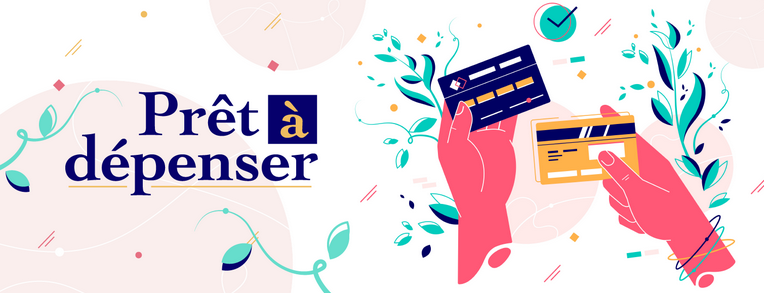

**Table of contents**<a id='toc0_'></a>    
- [Les datas](#toc1_)    
  - [Import](#toc1_1_)    
  - [Initialisations](#toc1_2_)    
  - [Fonctions](#toc1_3_)    
  - [Dataset](#toc1_4_)    
- [Exploration des données](#toc2_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc1_'></a>[Les datas](#toc0_)

## <a id='toc1_1_'></a>[Import](#toc0_)

In [156]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## <a id='toc1_2_'></a>[Initialisations](#toc0_)

In [157]:
# Initialisations :
SEED = 15 # Ici on définit RANDOM_SEED = constant seulement pour la reproductibilité
warnings.filterwarnings('ignore')

# Paramètres d'affichage :
pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)
pd.set_option("display.max_colwidth", None)

# Formats :
sns.set_style("whitegrid")
font_title = {
  "family": "serif",
  "color":  "black",
  "weight": "bold",
  "size": 20
}

## <a id='toc1_3_'></a>[Fonctions](#toc0_)

In [158]:
import fonctions_python as fc
import importlib
importlib.reload(fc)

<module 'fonctions_python' from 'c:\\Users\\jme1401\\Desktop\\OCR\\7-Implémentez un modèle de scoring\\Datas\\fonctions_python.py'>

## <a id='toc1_4_'></a>[Dataset](#toc0_)

In [159]:
path_datas_init = "./datas/datas_init/"
path_datas_save = "./datas/datas_save/"
path_models = "./models/"

In [160]:
df_datas_train = pd.read_csv(path_datas_save + 'df_datas_train.csv').set_index('SK_ID_CURR')
df_datas_test = pd.read_csv(path_datas_save + 'df_datas_test.csv').set_index('SK_ID_CURR')

In [161]:
df_datas_train_cleaned = pd.read_csv(path_datas_save + 'df_datas_train_cleaned.csv').set_index('SK_ID_CURR')
df_datas_test_cleaned = pd.read_csv(path_datas_save + 'df_datas_test_cleaned.csv').set_index('SK_ID_CURR')

# <a id='toc2_'></a>[Exploration des données](#toc0_)

In [162]:
df_datas_train_cleaned.describe()

EXT_SOURCE_2   EXT_SOURCE_3     DAYS_BIRTH  \
count  3.075070e+05  307507.000000  307507.000000   
mean   5.145025e-01       0.515698      43.937061   
std    1.908701e-01       0.174734      11.956116   
min    8.173617e-08       0.000527      20.517808   
25%    3.929737e-01       0.417100      34.008219   
50%    5.659614e-01       0.535276      43.150685   
75%    6.634218e-01       0.636376      53.923288   
max    8.549997e-01       0.896010      69.120548   

       PREV_NAME_CONTRACT_STATUS_Refused_MEAN  BURO_CREDIT_ACTIVE_Closed_MEAN  \
count                           307507.000000                   307507.000000   
mean                                 0.104963                        0.499639   
std                                  0.181073                        0.351214   
min                                  0.000000                        0.000000   
25%                                  0.000000                        0.000000   
50%                                  0.000000                        0.521739   
75%                                  0.176471                        0.750000   
max                                  1.000000                        1.000000   

       BURO_DAYS_CREDIT_MIN  DAYS_EMPLOYED  REGION_RATING_CLIENT  \
count         307507.000000  307507.000000         307507.000000   
mean            1510.086909    2251.582211              2.052461   
std             1010.154741    2136.160141              0.509034   
min                0.000000      -0.000000              1.000000   
25%              599.000000     933.000000              2.000000   
50%             1544.000000    1648.000000              2.000000   
75%             2511.000000    2760.000000              2.000000   
max             2922.000000   17912.000000              3.000000   

       PREV_NAME_PRODUCT_TYPE_walkin_MEAN  DAYS_EMPLOYED_PERC  \
count                       307507.000000       307507.000000   
mean                             0.076243            0.149994   
std                              0.179384            0.121811   
min                              0.000000           -0.000000   
25%                              0.000000            0.068385   
50%                              0.000000            0.118733   
75%                              0.000000            0.190996   
max                              1.000000            0.728811   

       DAYS_LAST_PHONE_CHANGE    CODE_GENDER  NAME_EDUCATION_TYPE  \
count           307507.000000  307507.000000        307507.000000   
mean               962.859876       0.658352             4.188279   
std                826.810230       0.474263             1.298753   
min                 -0.000000       0.000000             1.000000   
25%                274.000000       0.000000             3.000000   
50%                757.000000       1.000000             5.000000   
75%               1570.000000       1.000000             5.000000   
max               4292.000000       1.000000             5.000000   

       BURO_DAYS_CREDIT_MAX  DAYS_ID_PUBLISH  REG_CITY_NOT_WORK_CITY  \
count         307507.000000    307507.000000           307507.000000   
mean             419.258853      2994.201670                0.230457   
std              526.294533      1509.454566                0.421126   
min                0.000000         0.000000                0.000000   
25%               80.000000      1720.000000                0.000000   
50%              239.000000      3254.000000                0.000000   
75%              537.000000      4299.000000                0.000000   
max             2922.000000      7197.000000                1.000000   

       CLOSED_DAYS_CREDIT_MAX  BURO_CREDIT_ACTIVE_Active_MEAN  \
count           307507.000000                   307507.000000   
mean               679.201407                        0.353854   
std                680.346335                        0.320028   
min                  0.000000                        0.000000   
25% 

**Distribution de la TARGET**

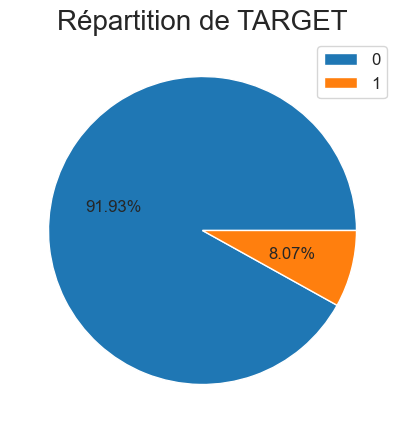

In [163]:
fc.pie_plot(df_datas_train_cleaned,['TARGET'])

Pour notre target, 1 correspond aux clients en difficulté de paiement (il a eu un retard de paiement de plus de X jours sur au moins une des Y premières échéances du crédit de notre échantillon), 0 correspond aux autres clients (qui n'ont donc pas de difficultés de paiement).

On constate que notre target est déséquilibrée. En effet, notre dataframe comporte beaucoup plus de clients ne possédant pas de difficultés de paiement (91.93%).

Nous verrons par la suite comment nous pouvons rééquilibrer notre target en vue d'une modélisation.

In [164]:
df_datas_train_init = pd.read_csv(path_datas_init + 'application_train.csv')
df_datas_train_init.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [165]:
col_cat = list(df_datas_train_init.select_dtypes(['object']).columns)
col_cat.append('TARGET')
fc.bar_plot_stacked(df_datas_train_init, col_cat, n_cols=2, fig=(40, 140))

On constate des modalités majoritaires pour la plupart des features. 

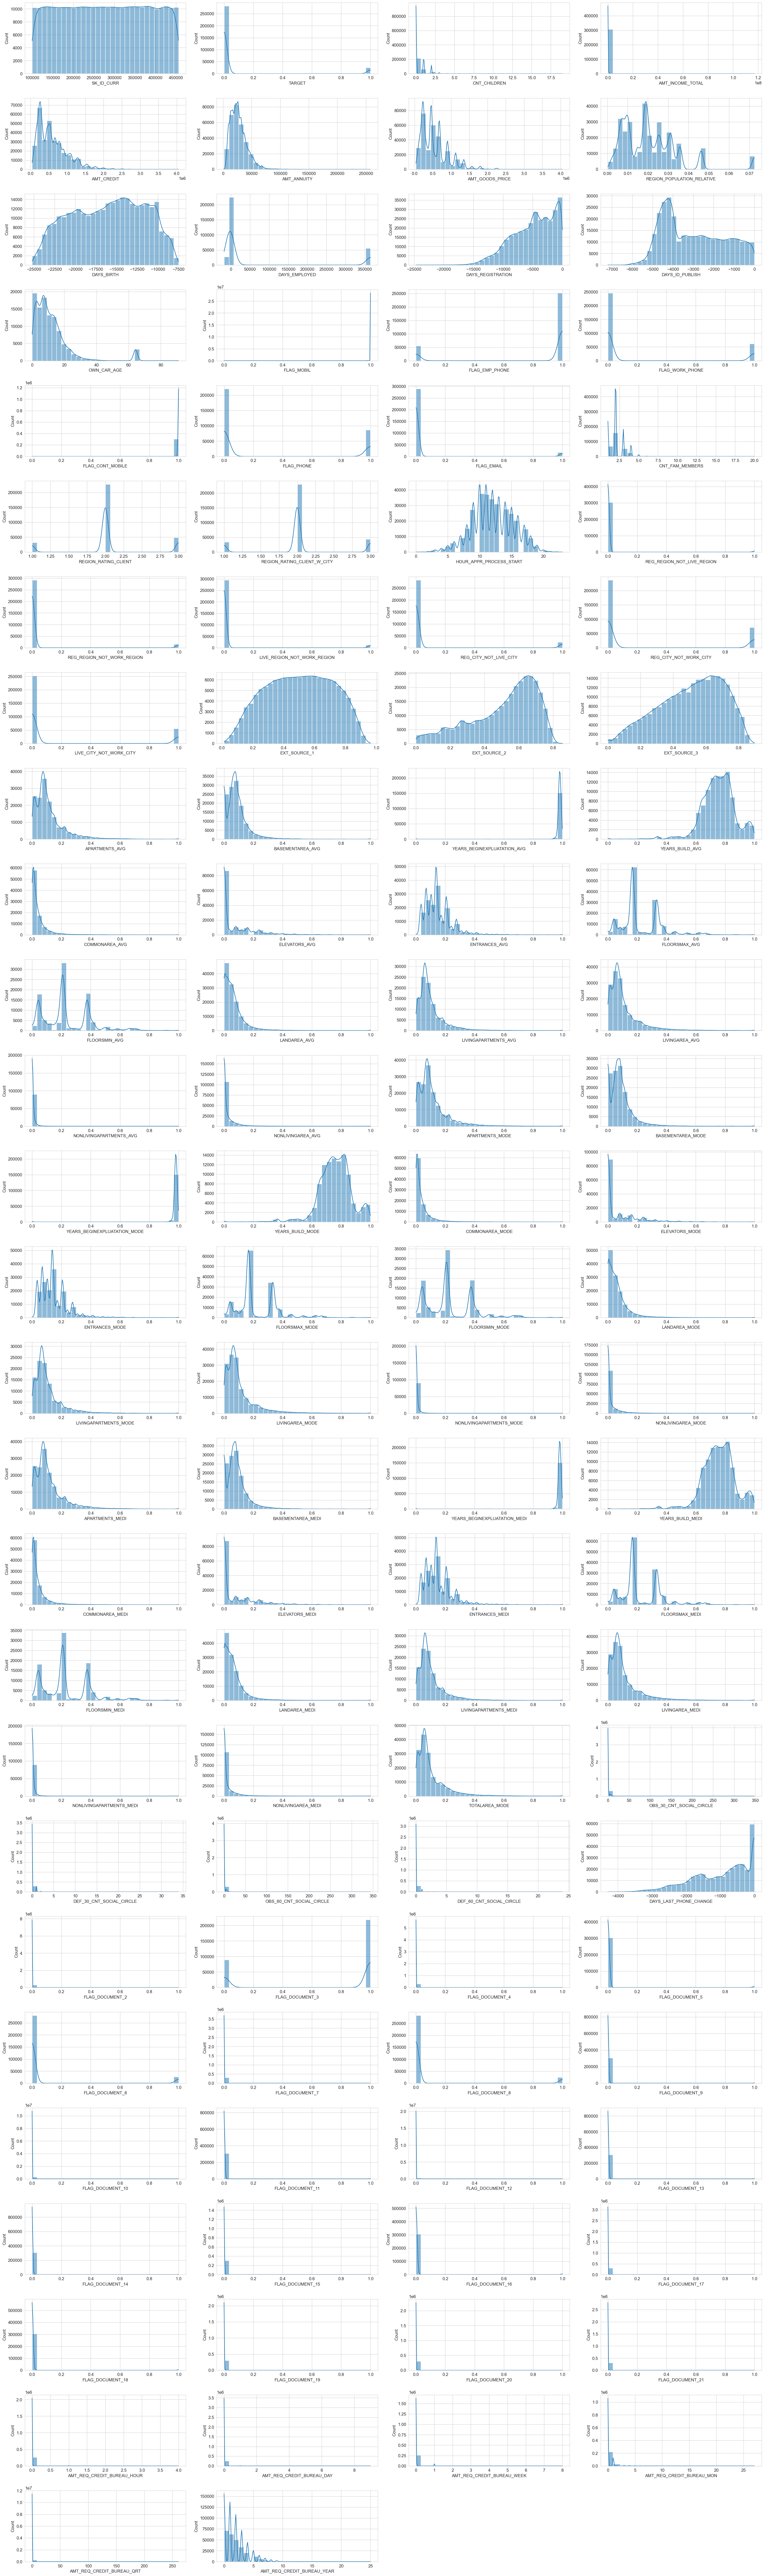

In [166]:
fc.distribution(df_datas_train_init, df_datas_train_init.select_dtypes(exclude=['object']).columns,
                n_cols=4, fig=(30,100))

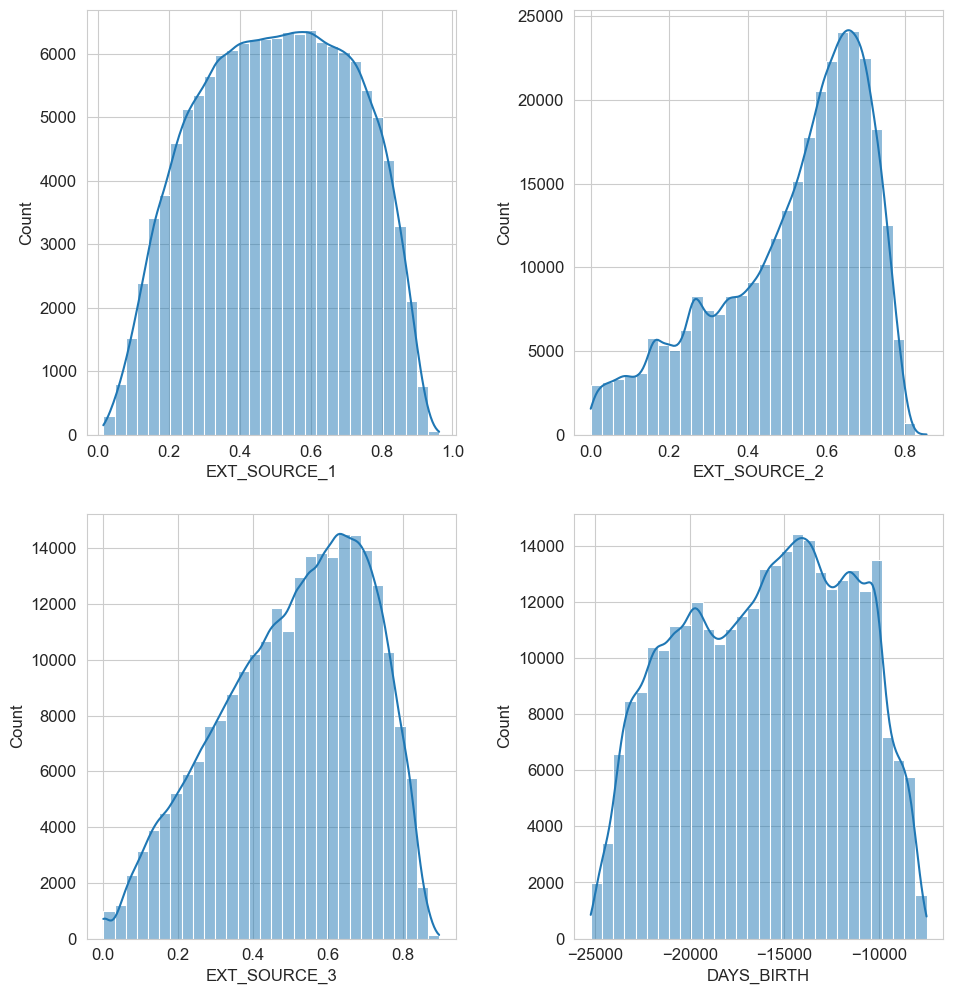

In [213]:
col_liste = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','DAYS_BIRTH']
fc.distribution(df_datas_train_init, col_liste, n_cols=2, fig=(10,15))

**KDE :**

Nous allons désormais étudier les densités de certaines variables via un graphique KDE.
Un graphique d'estimation de la densité du noyau (KDE) est une méthode de visualisation de la distribution des observations dans un ensemble de données, analogue à un histogramme. KDE représente les données à l'aide d'une courbe de densité de probabilité continue dans une ou plusieurs dimensions.
Par rapport à un histogramme, KDE peut produire un tracé moins encombré et plus interprétable, en particulier lors du dessin de plusieurs distributions.

Text(0.5, 1.0, "Distribution des clients suivant l'âge")

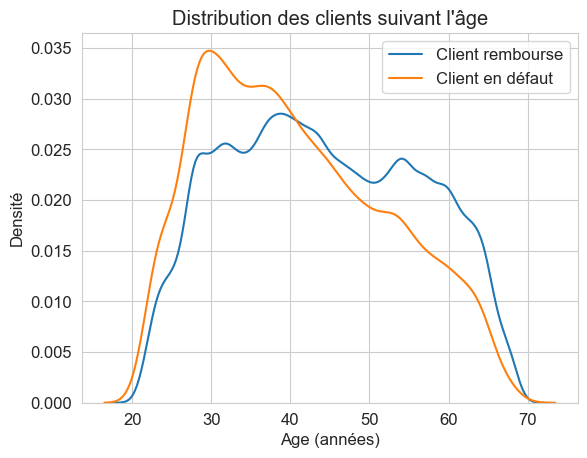

In [167]:
sns.kdeplot(df_datas_train_cleaned.loc[df_datas_train_cleaned['TARGET'] == 0, 'DAYS_BIRTH'], label = 'Client rembourse')
sns.kdeplot(df_datas_train_cleaned.loc[df_datas_train_cleaned['TARGET'] == 1, 'DAYS_BIRTH'], label = 'Client en défaut')

plt.xlabel('Age (années)')
plt.ylabel('Densité')
plt.legend()
plt.title("Distribution des clients suivant l'âge")

On peut constater ici que la courbe représentant les clients en défaut tend vers des âges plus jeunes, par rapport à la courbe représentant les clients qui remboursent. Cela pourrait signifier que les clients en défaut ont plus tendance à être jeunes.

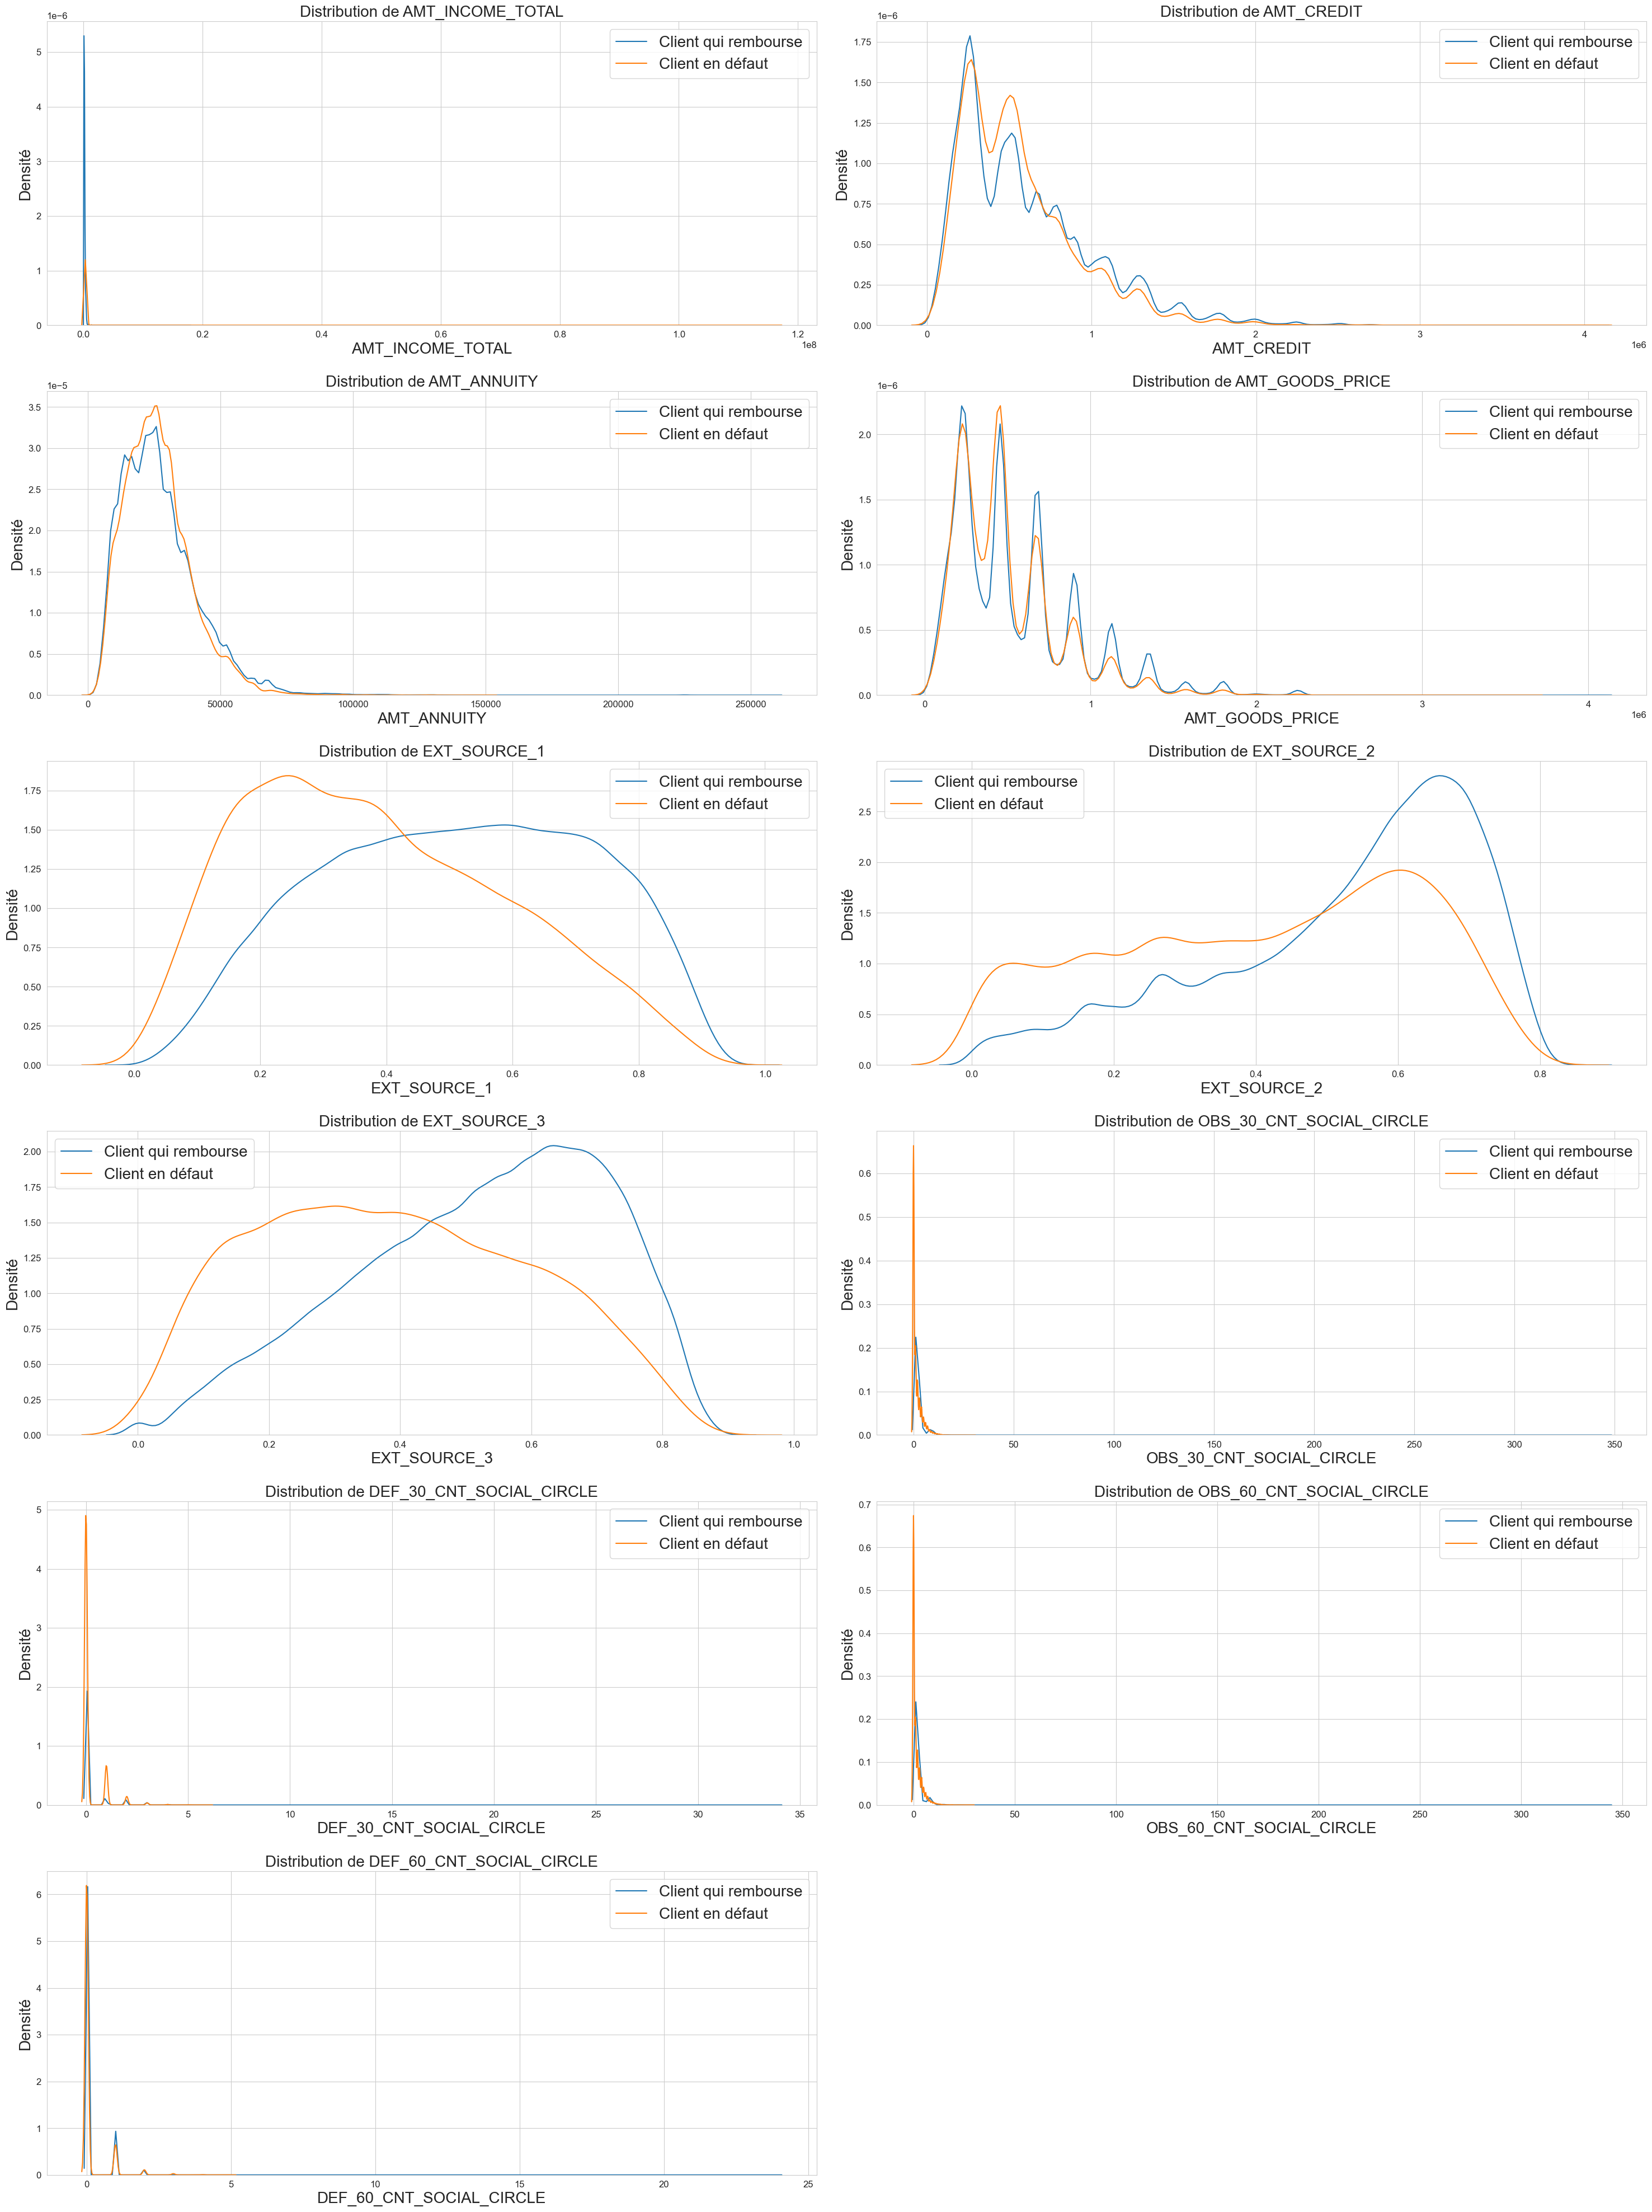

In [ ]:
col_liste = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE',
               'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE',
               'DEF_30_CNT_SOCIAL_CIRCLE', 'OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE']
fc.distribution_densite(df_datas_train_init, col_liste, n_cols=2, fig = (30,40))

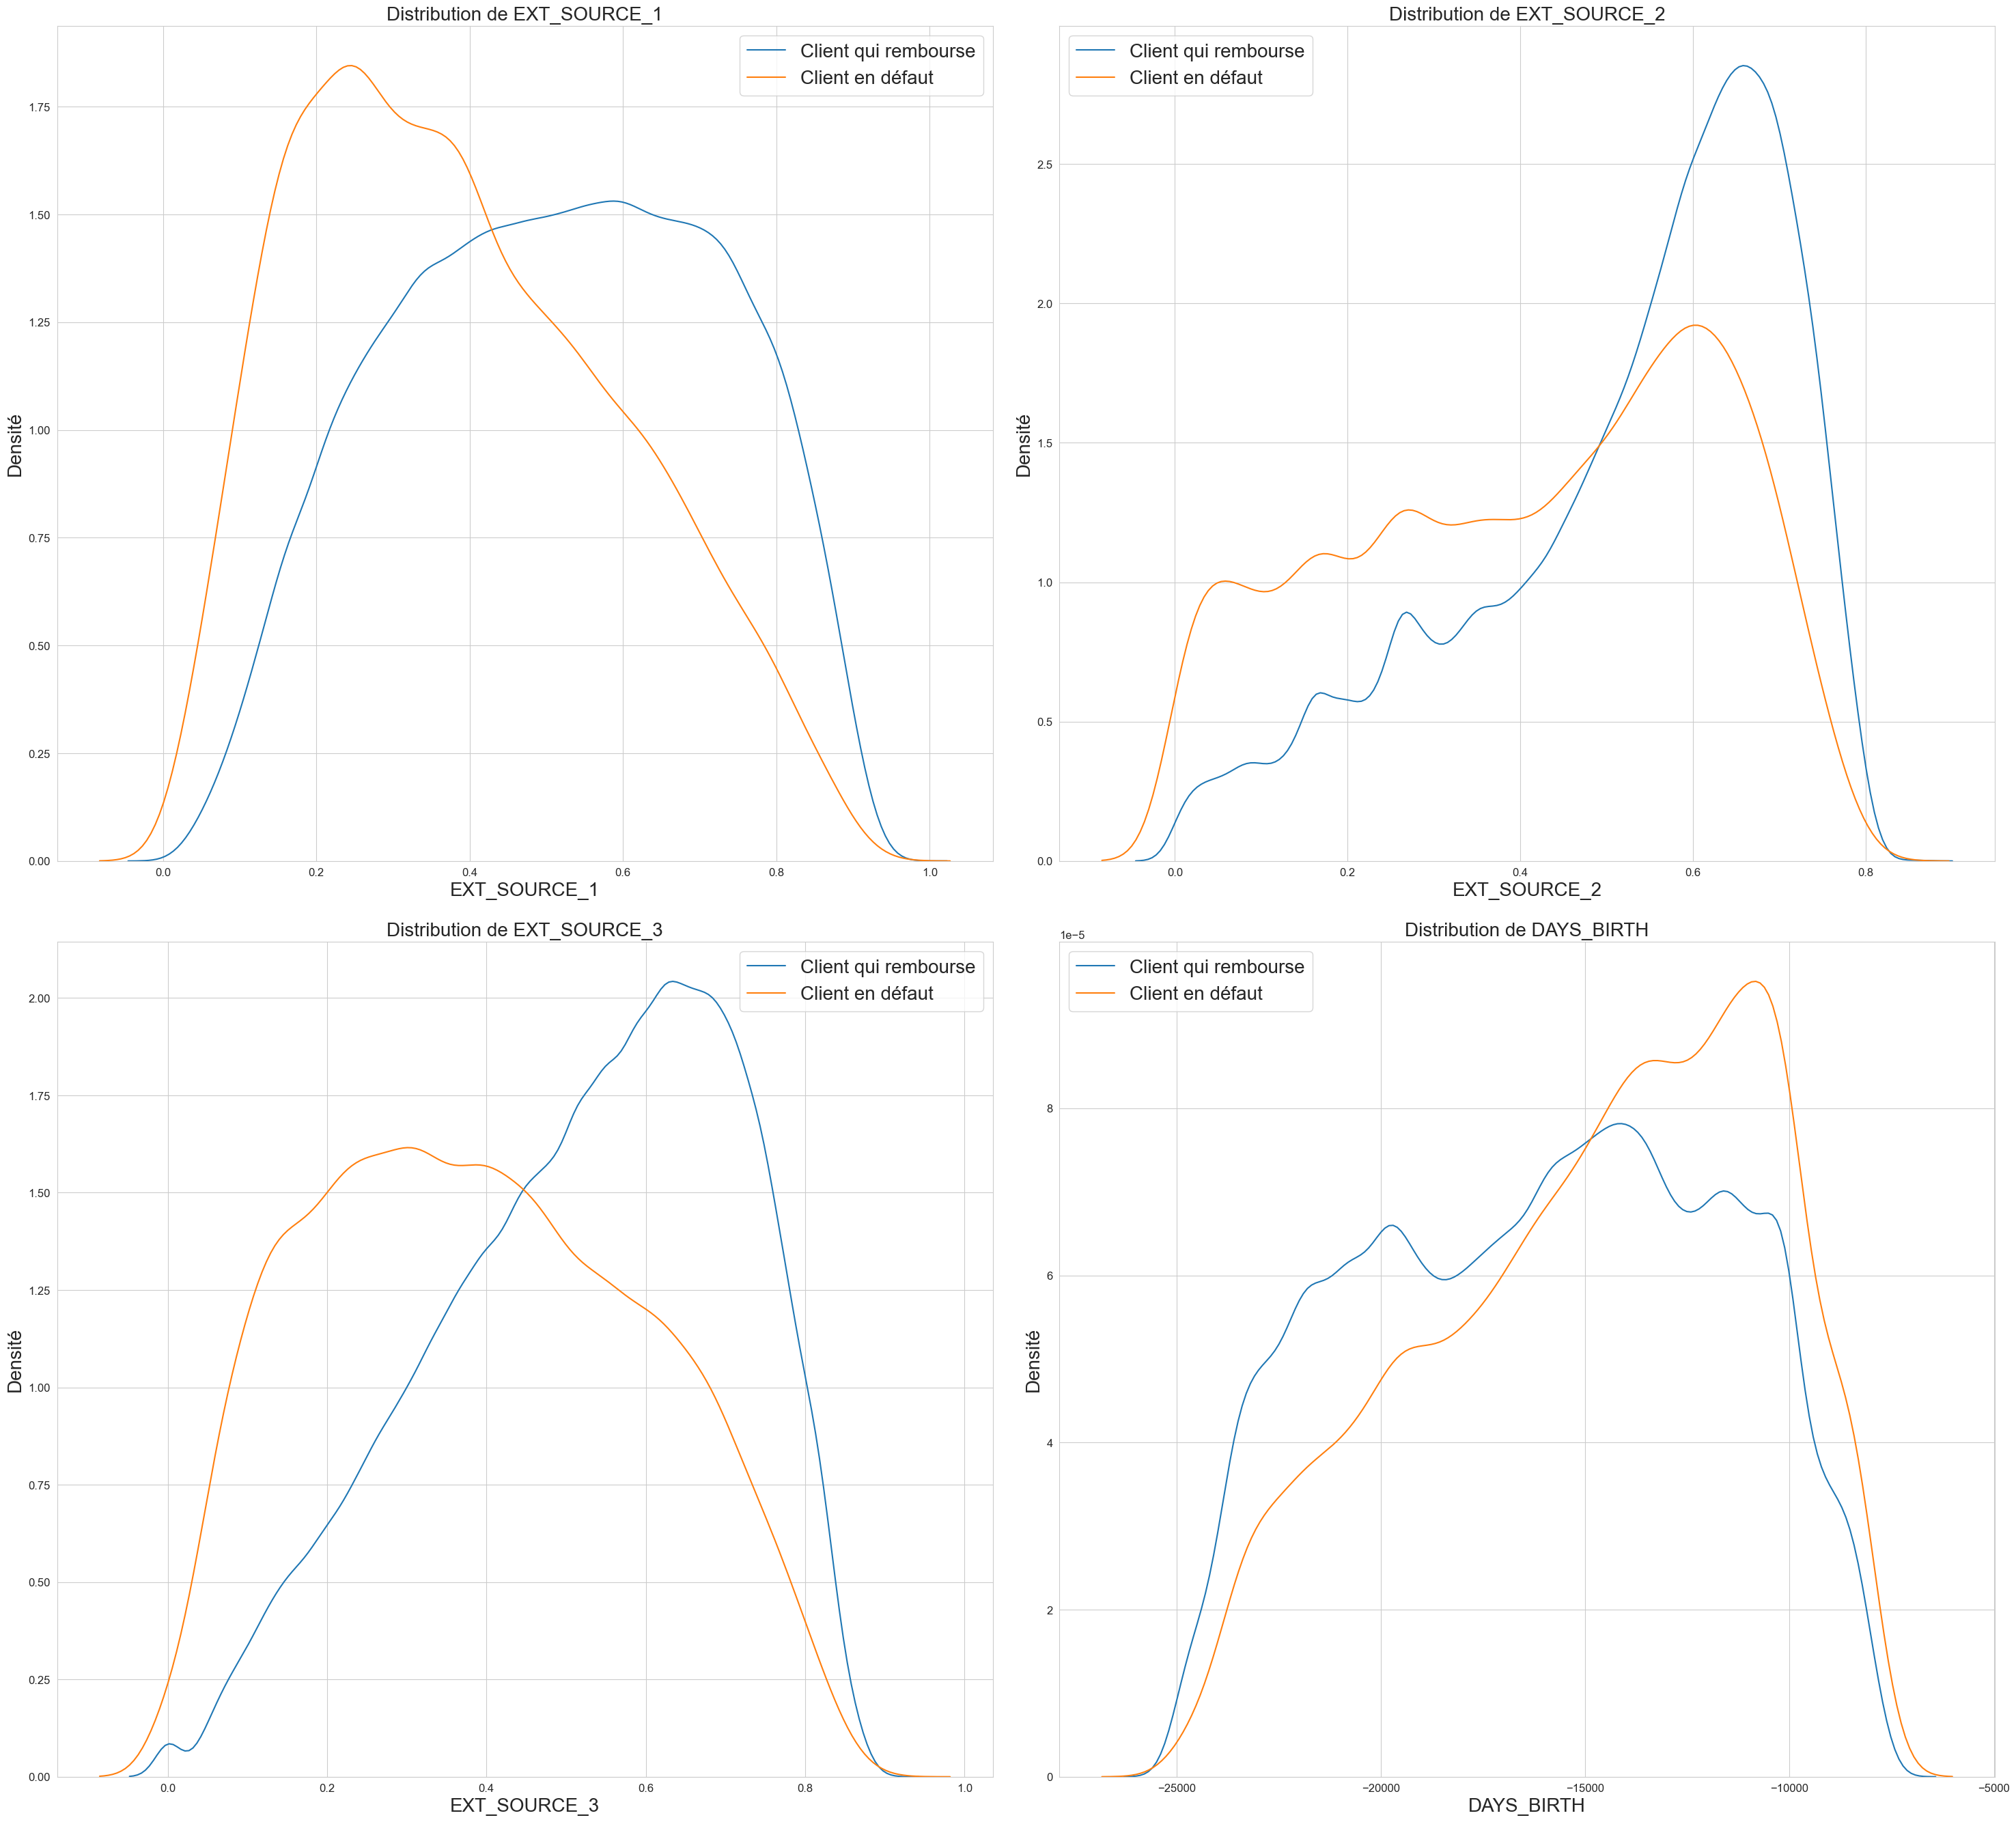

In [208]:
col_liste = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']
fc.distribution_densite(df_datas_train_init, col_liste, n_cols=2, fig = (30,40))

On ne constate pas de grande différences entre les deux classes (*Client qui rembourse* ou *Client en défaut*) pour la plupart des features exceptées *'EXT_SOURCE_1'*, *'EXT_SOURCE_2'* et *'EXT_SOURCE_3'*. En effet, on peut constater que la classe représentant les clients en défaut semble être plus présente lorsque les valeurs pour ces features sont faibles, et inversement pour la seconde classe.

Exterior Sources :

Les trois variables présentant les plus fortes corrélations négatives avec la cible sont EXT_SOURCE_1, EXT_SOURCE_2 et EXT_SOURCE_3. D'après la documentation, ces caractéristiques représentent un « score normalisé issu d'une source de données externe ». Je ne sais pas exactement ce que cela signifie, mais il pourrait s'agir d'une sorte de notation de crédit cumulative, établie à partir de nombreuses sources de données.

In [206]:
# Extract the EXT_SOURCE variables and show correlations
ext_data = df_datas_train_init[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

TARGET  EXT_SOURCE_1  EXT_SOURCE_2  EXT_SOURCE_3  DAYS_BIRTH
TARGET        1.000000     -0.155317     -0.160472     -0.178919    0.078239
EXT_SOURCE_1 -0.155317      1.000000      0.213982      0.186846   -0.600610
EXT_SOURCE_2 -0.160472      0.213982      1.000000      0.109167   -0.091996
EXT_SOURCE_3 -0.178919      0.186846      0.109167      1.000000   -0.205478
DAYS_BIRTH    0.078239     -0.600610     -0.091996     -0.205478    1.000000

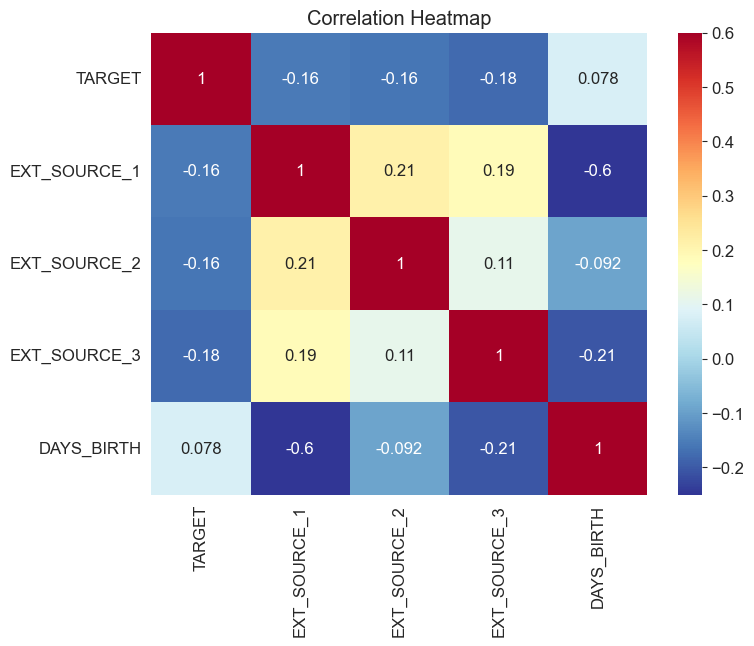

In [207]:
# Heatmap of correlations
plt.figure(figsize = (8, 6))
sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

Les trois variables EXT_SOURCE présentent des corrélations négatives avec la variable cible, ce qui indique que plus la valeur de EXT_SOURCE est élevée, plus le client est susceptible de rembourser son prêt. On constate également que DAYS_BIRTH est positivement corrélé à EXT_SOURCE_1, ce qui suggère que l'âge du client pourrait être un facteur influençant ce score.

**Boxplot :**

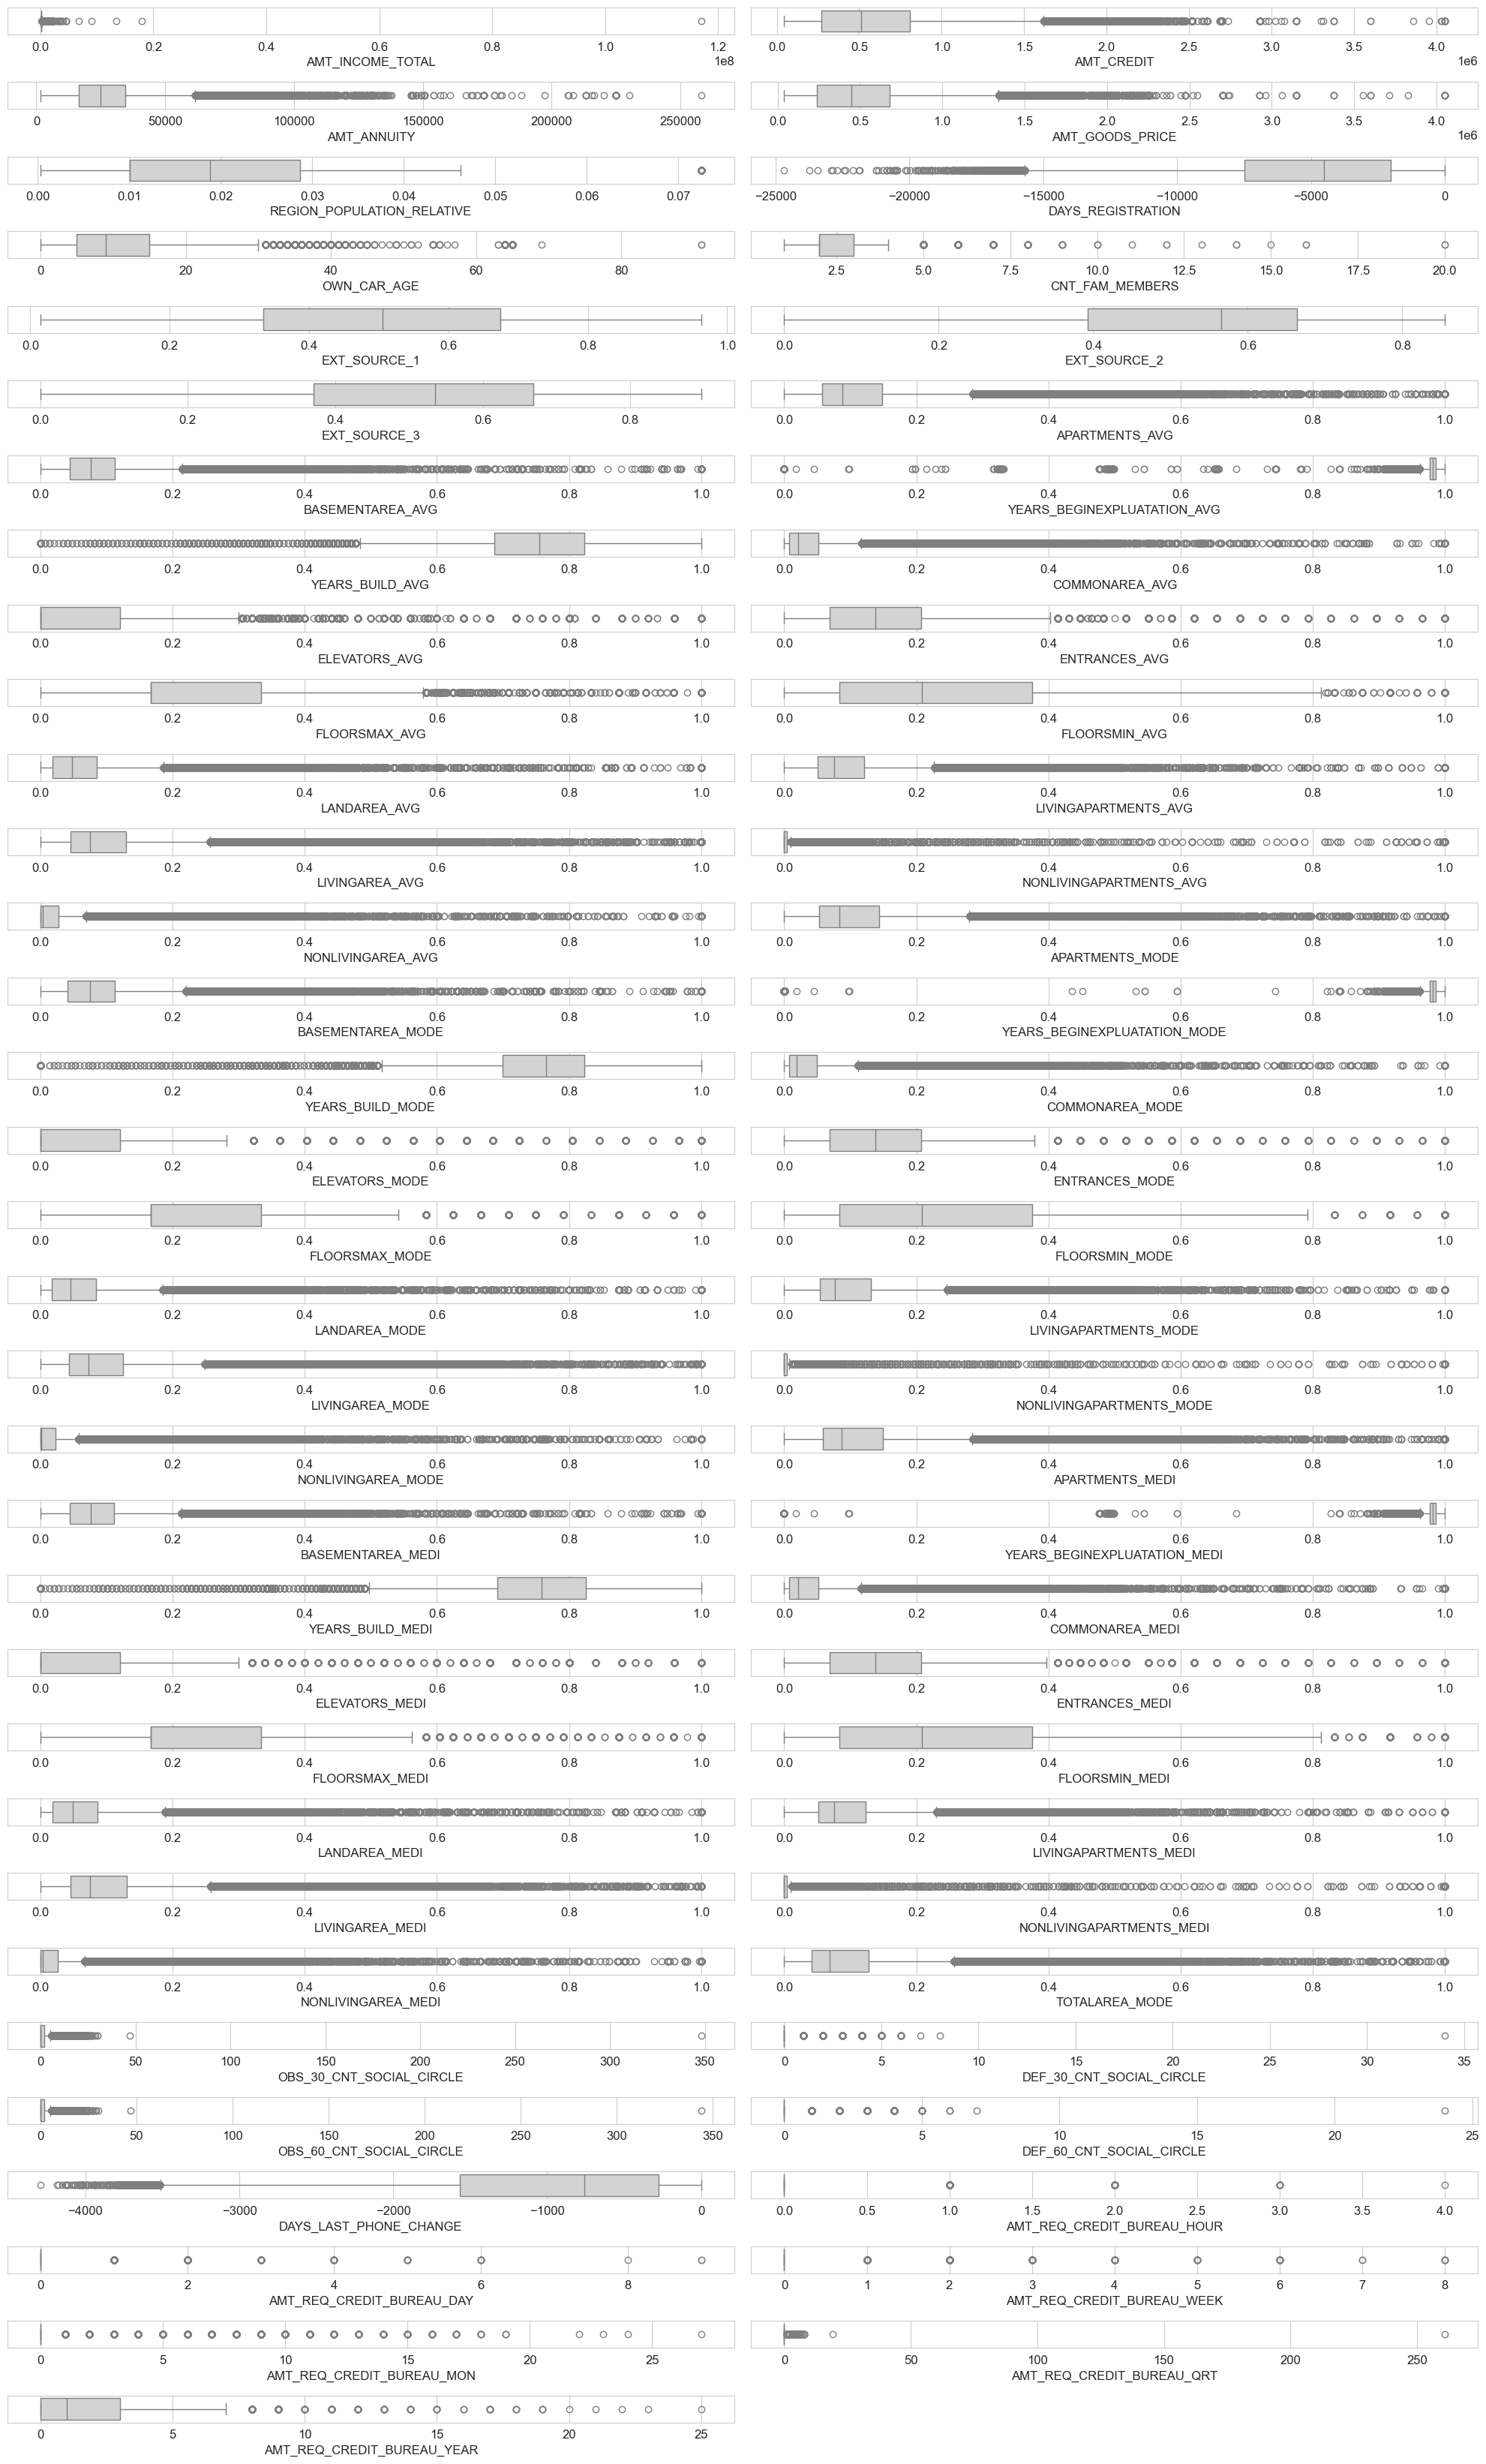

In [169]:
# Show outliers of each quantitative value
col_quant = list(df_datas_train_init.select_dtypes(['float64']).columns)
width = 20
height = ((len(col_quant) + 1) / 2) * 1

fig = plt.figure(figsize=(width, height))

for i, c in enumerate(col_quant, 1):
    ax = fig.add_subplot((len(col_quant) + 2) // 2, 2, i)
    sns.boxplot(x=df_datas_train_init[c], orient='h',
                color='lightgrey', ax=ax)
    
fig.tight_layout()

# Etude des features

**Défaut de remboursement par tranche d'âge :**

In [170]:
# Age information into a separate dataframe
age_data = df_datas_train_cleaned[['TARGET', 'DAYS_BIRTH']]

# Bin the age data
age_data['YEARS_BINNED'] = pd.cut(age_data['DAYS_BIRTH'], bins = np.linspace(20, 70, num = 11))

# Group by the bin and calculate averages
age_groups  = age_data.groupby('YEARS_BINNED').mean()

Text(0.5, 1.0, "Défaut de remboursement en fonction de l'age")

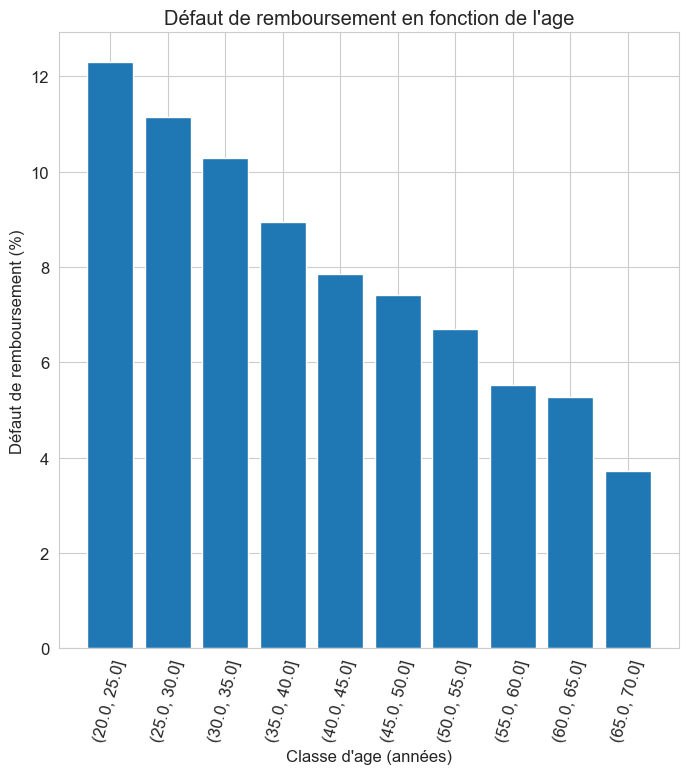

In [171]:
plt.figure(figsize = (8, 8))

# Graph the age bins and the average of the target as a bar plot
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])

# Plot labeling
plt.xticks(rotation = 75)
plt.xlabel("Classe d'age (années)")
plt.ylabel("Défaut de remboursement (%)")
plt.title("Défaut de remboursement en fonction de l'age")

Le risque de non-paiement augmente avec la jeunesse des clients.

**Défaut de remboursement par tranche d\'ancienneté :**

In [172]:
df_emp = df_datas_train_cleaned[['TARGET', 'DAYS_EMPLOYED']].copy()
df_emp['YEARS_EMP'] = df_emp['DAYS_EMPLOYED'] / (365)
df_emp['Tranche_age'] = pd.cut(df_emp['YEARS_EMP'], bins = np.linspace(0, 50, num = 11))
df_emp.head()

TARGET  DAYS_EMPLOYED  YEARS_EMP  Tranche_age
SK_ID_CURR                                               
100002           1          637.0   1.745205   (0.0, 5.0]
100003           0         1188.0   3.254795   (0.0, 5.0]
100004           0          225.0   0.616438   (0.0, 5.0]
100006           0         3039.0   8.326027  (5.0, 10.0]
100007           0         3038.0   8.323288  (5.0, 10.0]

In [173]:
df_emp_groupe = df_emp.groupby('Tranche_age').mean()

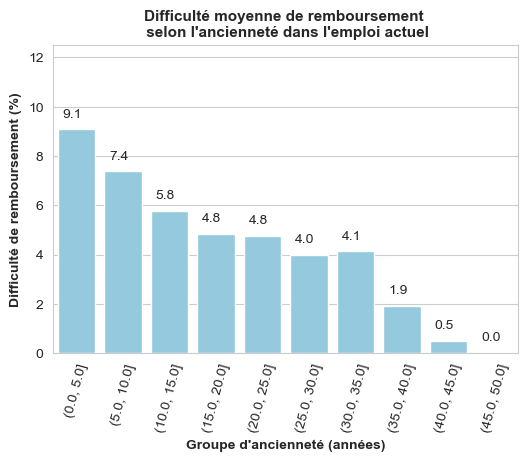

In [174]:
# Visualisation par histogramme
plt.figure(figsize = (6, 4))
plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_emp_groupe, x= df_emp_groupe.index.astype(str), y = df_emp_groupe["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 75)
plt.xlabel("Groupe d'ancienneté (années)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
plt.ylim(0,12.5)
plt.title("Difficulté moyenne de remboursement \n selon l'ancienneté dans l'emploi actuel", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
anciennete_nombre = df_emp_groupe["TARGET"]*100
indices = df_emp_groupe.index
for i, idx in enumerate(indices):
    plt.text(i-0.3, anciennete_nombre[idx]+0.5, round(anciennete_nombre[idx], 1))

On voit ici que plus un client est ancien, moins il y a de risques de défaut de paiement, ce qui est en accord avec notre analyse précédente sur l’âge.

**Défaut de remboursement par tranche d\'ancienneté du téléphone :**

In [175]:
df_phone = df_datas_train_cleaned[['TARGET', 'DAYS_LAST_PHONE_CHANGE']].copy()
df_phone['YEARS_PHONE'] = df_phone['DAYS_LAST_PHONE_CHANGE'] / (365)
df_phone['Tranche_annee'] = pd.cut(df_phone['YEARS_PHONE'], bins = np.linspace(0, 11, num = 12))
df_phone.head()

TARGET  DAYS_LAST_PHONE_CHANGE  YEARS_PHONE Tranche_annee
SK_ID_CURR                                                           
100002           1                  1134.0     3.106849    (3.0, 4.0]
100003           0                   828.0     2.268493    (2.0, 3.0]
100004           0                   815.0     2.232877    (2.0, 3.0]
100006           0                   617.0     1.690411    (1.0, 2.0]
100007           0                  1106.0     3.030137    (3.0, 4.0]

In [176]:
df_phone_groupe = df_phone.groupby('Tranche_annee').mean()

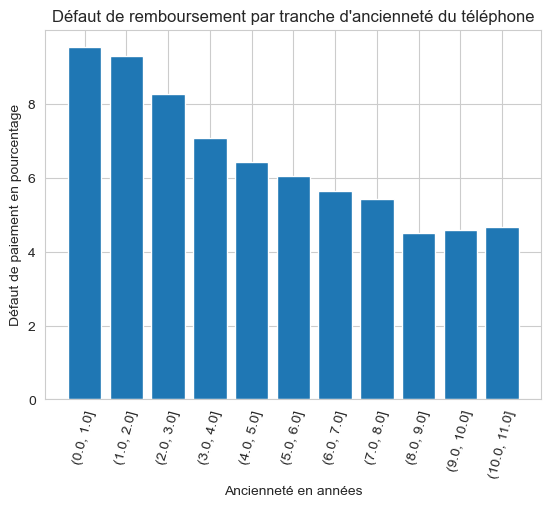

In [177]:
plt.bar(df_phone_groupe .index.astype(str), df_phone_groupe['TARGET'] * 100)
plt.title('Défaut de remboursement par tranche d\'ancienneté du téléphone')
plt.xlabel('Ancienneté en années')
plt.ylabel('Défaut de paiement en pourcentage')
plt.xticks(rotation = 75)
plt.show()

Plus un téléphone est ancien, moins il y a de risques de défaut de paiement.

**Remboursement en fonction du niveau d'études du client :**

In [178]:
def fn_categorie_name_type_cat(x, col_liste_type, categorie_name_type):
    id_col = 0.0
    col_value = "N/A"
    for col_type in col_liste_type:
        id_col += 1.0
        if (x == id_col):
            col_value = fc.replace_string(col_type, categorie_name_type + "_")
    return col_value

In [179]:
# Création de df_categorie_name_type
var_categorie_name_type = "NAME_EDUCATION_TYPE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

NAME_EDUCATION_TYPE    TARGET        NAME_EDUCATION_TYPE_CAT
3                  4.0  0.109277                Lower secondary
4                  5.0  0.089400  Secondary / secondary special
2                  3.0  0.084858              Incomplete higher
1                  2.0  0.053552               Higher education
0                  1.0  0.018293                Academic degree

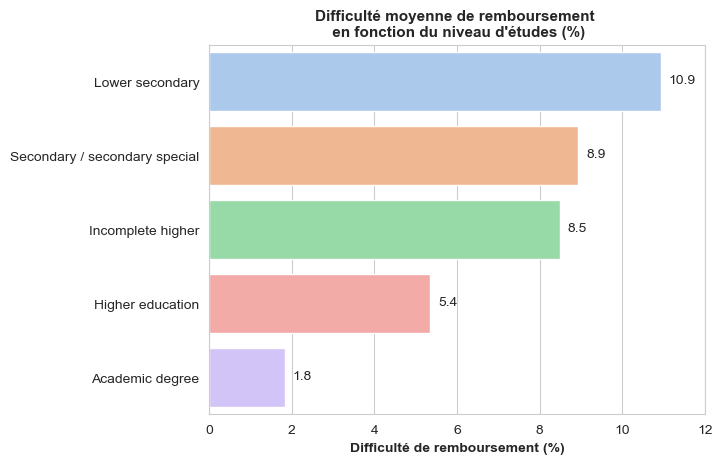

In [180]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n en fonction du niveau d'études (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

D'après cette visualisation, le niveau d'études semble clairement impacter la capacité de remboursement du prêt. Ainsi, plus le niveau d'études est élevé, moins il y a de difficultés de remboursement.

**Remboursement en fonction du statut familial :**

In [181]:
# Création de df_categorie_name_type
var_categorie_name_type = "NAME_FAMILY_STATUS"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

NAME_FAMILY_STATUS    TARGET NAME_FAMILY_STATUS_CAT
0                 1.0  0.099449         Civil marriage
3                 4.0  0.098077   Single / not married
2                 3.0  0.081942              Separated
1                 2.0  0.075600                Married
5                 6.0  0.058242                  Widow
4                 5.0  0.000000                Unknown

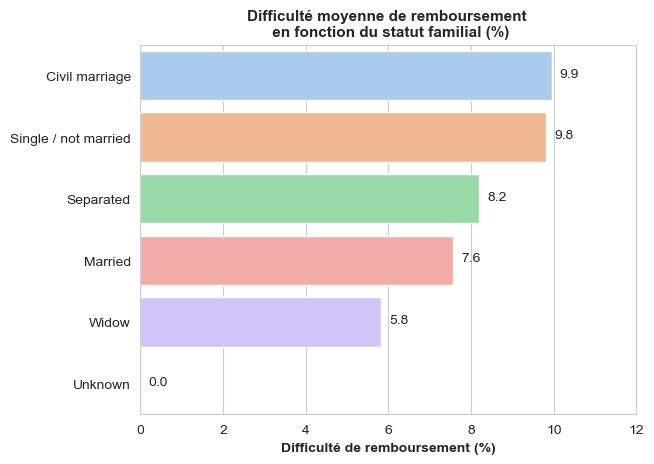

In [182]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n en fonction du statut familial (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

Il semble que les veufs/veuves présentent le moins de difficultés de remboursement et que les célibataires / non mariés en présentent le plus. Par conséquent.

**Remboursement en fonction du type de revenus du clients :**

In [183]:
# Création de df_categorie_name_type
var_categorie_name_type = "NAME_INCOME_TYPE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

NAME_INCOME_TYPE    TARGET  NAME_INCOME_TYPE_CAT
2               3.0  0.400000       Maternity leave
6               7.0  0.363636            Unemployed
7               8.0  0.095887               Working
1               2.0  0.074844  Commercial associate
4               5.0  0.057550         State servant
3               4.0  0.053864             Pensioner
0               1.0  0.000000           Businessman
5               6.0  0.000000               Student

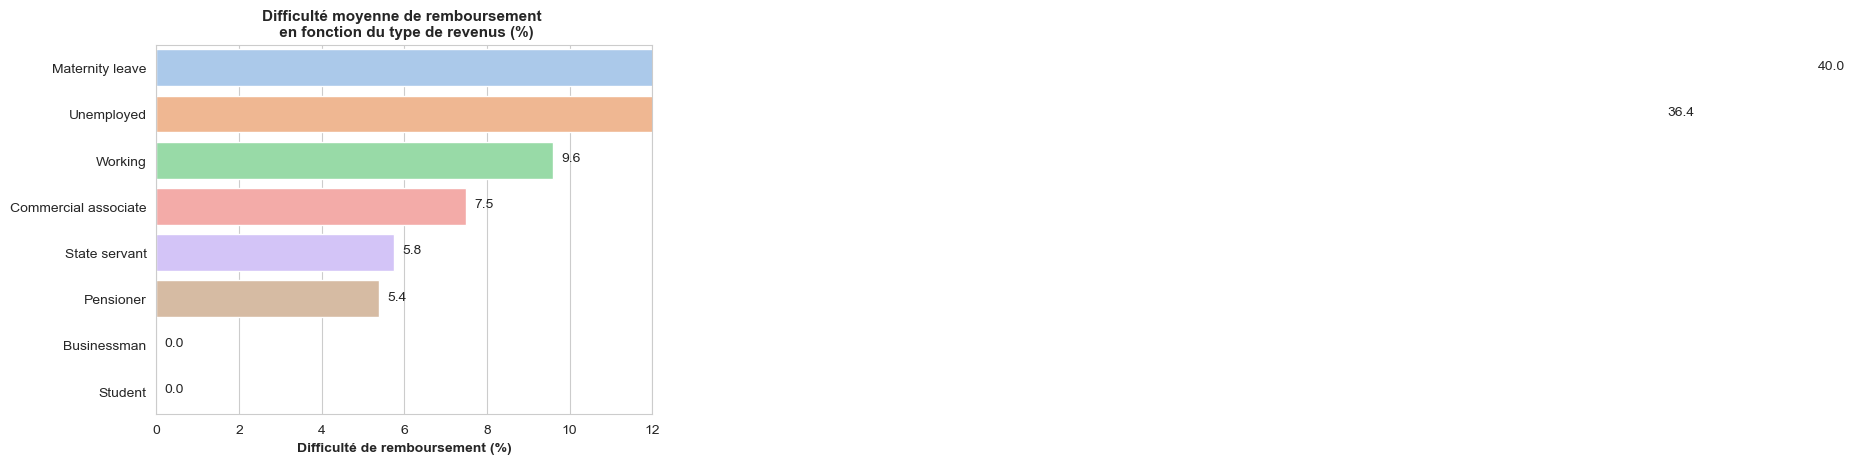

In [184]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n en fonction du type de revenus (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

D'après cette visualisation, il semble indéniable que les femmes en congés maternité et les chômeurs sont des personnes à risque.

**Remboursement en fonction du secteur d'activités du client :**

In [185]:
# Création de df_categorie_name_type
var_categorie_name_type = "ORGANIZATION_TYPE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

ORGANIZATION_TYPE    TARGET   ORGANIZATION_TYPE_CAT
54               55.0  0.157540       Transport: type 3
18               19.0  0.134328       Industry: type 13
25               26.0  0.125000        Industry: type 8
38               39.0  0.117062              Restaurant
7                 8.0  0.116798            Construction
6                 7.0  0.111538                Cleaning
14               15.0  0.110683        Industry: type 1
20               21.0  0.106195        Industry: type 3
36               37.0  0.106061                 Realtor
1                 2.0  0.104727             Agriculture
47               48.0  0.103379           Trade: type 3
42               43.0  0.101739           Self-employed
21               22.0  0.101482        Industry: type 4
40               41.0  0.099784                Security
51               52.0  0.094496           Trade: type 7
5                 6.0  0.092996  Business Entity Type 3
55               56.0  0.092812       Transport: type 4
32               33.0  0.091483                  Mobile
45               46.0  0.089080           Trade: type 1
16               17.0  0.086538       Industry: type 11
4                 5.0  0.085284  Business Entity Type 2
35               36.0  0.084376                  Postal
0                 1.0  0.081585             Advertising
3                 4.0  0.081397  Business Entity Type 1
24               25.0  0.080337        Industry: type 7
13               14.0  0.079446                 Housing
29               30.0  0.078689          Legal Services
53               54.0  0.078040       Transport: type 2
33               34.0  0.076425                   Other
44               45.0  0.076256                 Telecom
19               20.0  0.072052        Industry: type 2
23               24.0  0.071429        Industry: type 6
10               11.0  0.071429               Emergency
28               29.0  0.070359            Kindergarten
46               47.0  0.070000           Trade: type 2
11               12.0  0.069781              Government
22               23.0  0.068447        Industry: type 5
26               27.0  0.066805        Industry: type 9
9                10.0  0.066316             Electricity
43               44.0  0.066032                Services
30               31.0  0.065851                Medicine
15               16.0  0.064220       Industry: type 10
12               13.0  0.064182                   Hotel
49               50.0  0.061224           Trade: type 5
39               40.0  0.059148                  School
37               38.0  0.058824                Religion
27               28.0  0.056951               Insurance
8                 9.0  0.055409                 Culture
57               58.0  0.053996                     XNA
2                 3.0  0.051855                    Bank
31               32.0  0.051253                Military
34               35.0  0.049979                  Police
56               57.0  0.048983              University
41               42.0  0.048632     Security Ministries
50               51.0  0.045959           Trade: type 6
52               53.0  0.044776       Transport: type 1
17               18.0  0.037940       Industry: type 12
48               49.0  0.031250           Trade: type 4

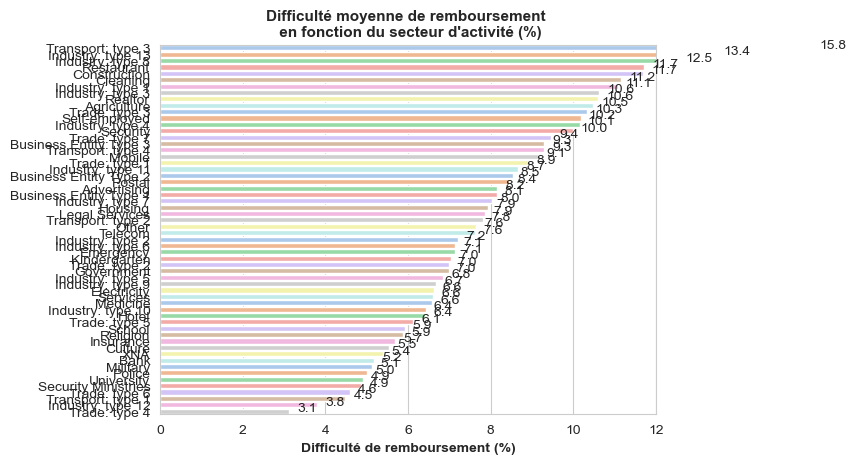

In [186]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n en fonction du secteur d'activité (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

**Remboursement en fonction de l'emploi du client :**

In [187]:
# Création de df_categorie_name_type
var_categorie_name_type = "OCCUPATION_TYPE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

OCCUPATION_TYPE    TARGET    OCCUPATION_TYPE_CAT
10             10.0  0.171606     Low-skill Laborers
5               5.0  0.113261                Drivers
18             18.0  0.112760   Waiters/barmen staff
17             17.0  0.107424         Security staff
9               9.0  0.105788               Laborers
3               3.0  0.104440          Cooking staff
15             15.0  0.096318            Sales staff
2               2.0  0.096067         Cleaning staff
14             14.0  0.078562          Realty agents
16             16.0  0.070498            Secretaries
12             12.0  0.067002         Medicine staff
13             13.0  0.065988  Private service staff
0               0.0  0.065132                    N/A
8               8.0  0.064639               IT staff
6               6.0  0.063943               HR staff
4               4.0  0.063042             Core staff
11             11.0  0.062140               Managers
7               7.0  0.061599  High skill tech staff
1               1.0  0.048303            Accountants

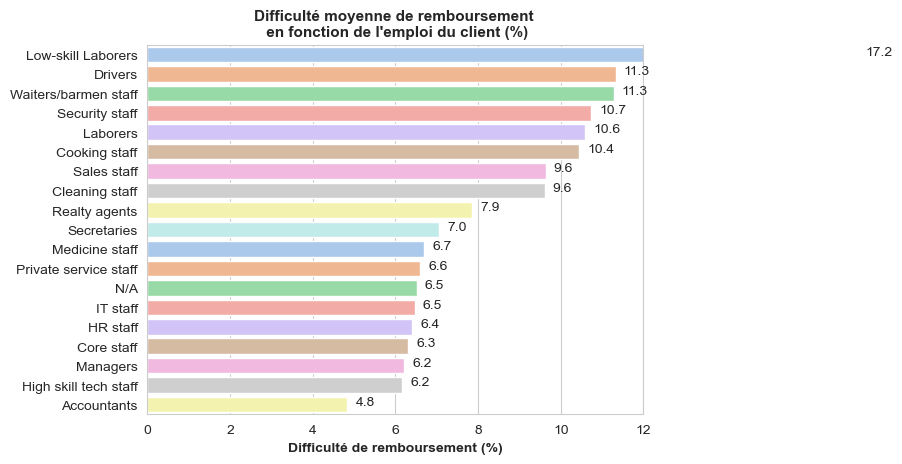

In [188]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n en fonction de l'emploi du client (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

**Remboursement en fonction du type de logement :**

In [189]:
# Création de df_categorie_name_type
var_categorie_name_type = "NAME_HOUSING_TYPE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

NAME_HOUSING_TYPE    TARGET NAME_HOUSING_TYPE_CAT
4                5.0  0.123131      Rented apartment
5                6.0  0.116981          With parents
2                3.0  0.085405   Municipal apartment
0                1.0  0.079323       Co-op apartment
1                2.0  0.077958     House / apartment
3                4.0  0.065724      Office apartment

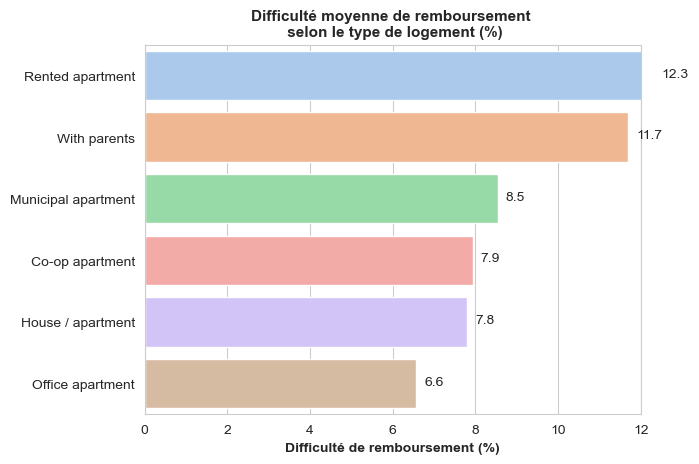

In [190]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n selon le type de logement (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

Il semblerait que les clients étant en location ou habitant avec leurs parents aient davantage de difficultés de remboursement.

**Remboursement en fonction de l'accompagnement ou non de l'emprunteur :**

In [191]:
# Création de df_categorie_name_type
var_categorie_name_type = "NAME_TYPE_SUITE"
col_liste_categorie_name_type = df_datas_train.columns[df_datas_train.columns.str.contains(var_categorie_name_type + '_')]

df_categorie_name_type =  df_datas_train_cleaned[["TARGET", var_categorie_name_type]]
df_categorie_name_type = df_categorie_name_type.groupby(var_categorie_name_type)["TARGET"].mean().reset_index()
df_categorie_name_type_sorted = df_categorie_name_type.sort_values(by="TARGET", ascending=False)

df_categorie_name_type_sorted[var_categorie_name_type + '_CAT'] = df_categorie_name_type_sorted[var_categorie_name_type].apply(fn_categorie_name_type_cat, col_liste_type=col_liste_categorie_name_type, categorie_name_type=var_categorie_name_type)
df_categorie_name_type_sorted

NAME_TYPE_SUITE    TARGET        NAME_TYPE_SUITE_CAT
11             11.0  0.128421          PREV_Other_A_MEAN
12             12.0  0.101281          PREV_Other_B_MEAN
15             15.0  0.094002              PREV_nan_MEAN
4               4.0  0.084806                    Other_A
5               5.0  0.082624                    Other_B
10             10.0  0.081081  PREV_Group of people_MEAN
7               7.0  0.079709              Unaccompanied
14             14.0  0.077981    PREV_Unaccompanied_MEAN
13             13.0  0.077704  PREV_Spouse, partner_MEAN
6               6.0  0.077313            Spouse, partner
3               3.0  0.075000            Group of people
9               9.0  0.073926           PREV_Family_MEAN
2               2.0  0.073101                     Family
1               1.0  0.071277                   Children
8               8.0  0.069846         PREV_Children_MEAN
0               0.0  0.055777                        N/A

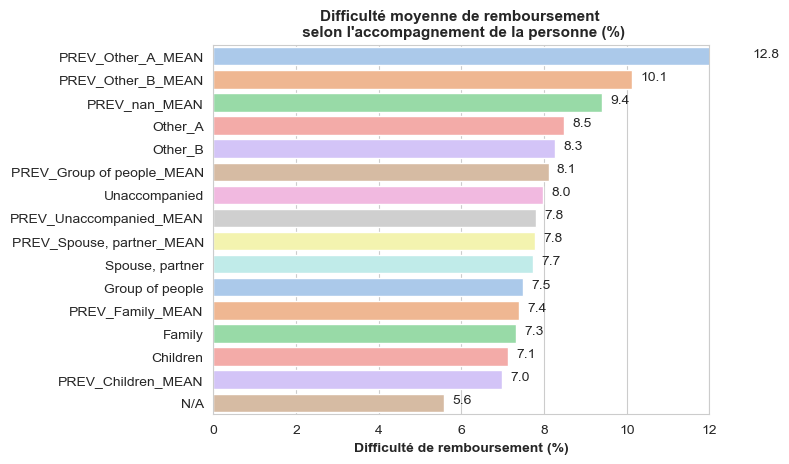

In [192]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = df_categorie_name_type_sorted, x= df_categorie_name_type_sorted["TARGET"]*100, y = var_categorie_name_type + "_CAT", palette=palette)
ax.set_xlabel("Difficulté de remboursement (%)", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_xlim(0,12)
ax.set_ylabel("")
ax.set_title("Difficulté moyenne de remboursement \n selon l'accompagnement de la personne (%)", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
nombre = df_categorie_name_type_sorted["TARGET"]*100
for i, v in enumerate(nombre):
    ax.text(v+0.2,i+0.02, str(round(v, 1)), fontsize=10, fontname="sans-serif")

plt.show()

Le fait qu'une personne accompagne l'emprunteur ne semble pas impacter sur sa difficulté ou non de rembourser son prêt.

**Remboursement en fonction possession d'un bien immobilier :**

In [193]:
# Création d'une variable bien_client
bien_client = df_datas_train[["TARGET", "FLAG_OWN_REALTY"]]

# Réalisation d'un groupby
bien_client = bien_client.groupby("FLAG_OWN_REALTY")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
bien_client_sorted = bien_client.sort_values(by="TARGET", ascending=False)
bien_client_sorted

FLAG_OWN_REALTY    TARGET
1                1  0.083249
0                0  0.079617

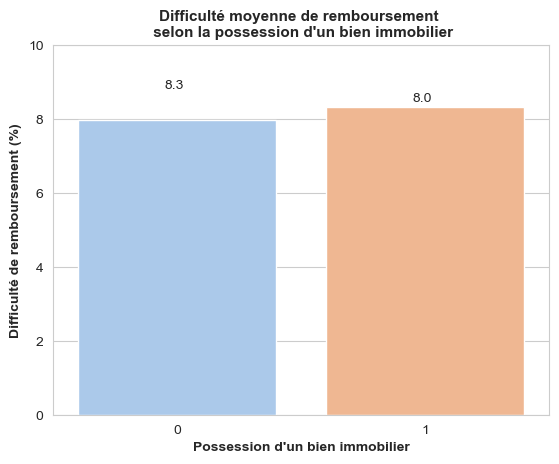

In [194]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = bien_client_sorted, x= "FLAG_OWN_REALTY", y = bien_client_sorted["TARGET"]*100, palette=palette)
ax.set_xlabel("Possession d'un bien immobilier", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_ylim(0,10)
ax.set_title("Difficulté moyenne de remboursement \n selon la possession d'un bien immobilier", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
bien_nombre = bien_client_sorted["TARGET"]*100
for i, v in enumerate(bien_nombre):
    ax.text(i-0.05, v+0.5, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

Le fait de posséder ou non un bien immobilier ne semble pas influer sur la difficulté de remboursement d'un crédit.

**Remboursement en fonction de la possession d'une voiture :**

In [195]:
# Création d'une variable car client
car_client = df_datas_train[["TARGET", "FLAG_OWN_CAR"]]

# Réalisation d'un groupby
car_client = car_client.groupby("FLAG_OWN_CAR")["TARGET"].mean().reset_index()

# Tri par ordre décroissant
car_client_sorted = car_client.sort_values(by="TARGET", ascending=False)
car_client_sorted

FLAG_OWN_CAR    TARGET
0             0  0.085003
1             1  0.072439

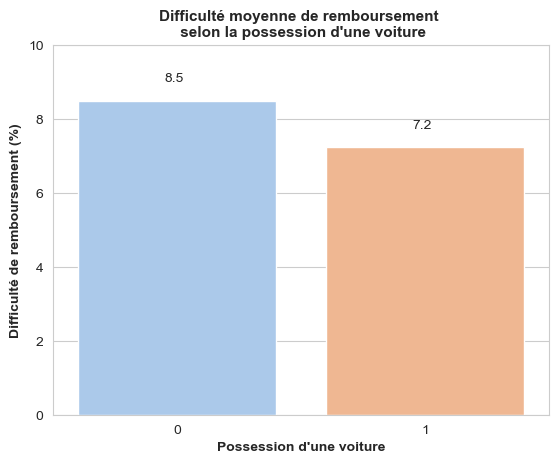

In [196]:
# Visualisation par histogramme
fig, ax = plt.subplots()
palette = sns.color_palette("pastel")

plt.rcParams.update({"font.size" : 10})
sns.barplot(data = car_client_sorted, x= "FLAG_OWN_CAR", y = car_client_sorted["TARGET"]*100, palette=palette)
ax.set_xlabel("Possession d'une voiture", fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 10, fontweight = "bold")
ax.set_ylim(0,10)
ax.set_title("Difficulté moyenne de remboursement \n selon la possession d'une voiture", fontname = "sans-serif", fontsize = 11, fontweight = "bold")
    
car_nombre = car_client_sorted["TARGET"]*100
for i, v in enumerate(car_nombre):
    ax.text(i-0.05, v+0.5, round(v, 1), fontsize=10, fontname="sans-serif")

plt.show()

**Remboursement en fonction du montant du crédit :**

In [197]:
# Petit rappel sur le montant des crédits
df_datas_train["AMT_CREDIT"].describe()

count    3.075070e+05
mean     5.990286e+05
std      4.024926e+05
min      4.500000e+04
25%      2.700000e+05
50%      5.135310e+05
75%      8.086500e+05
max      4.050000e+06
Name: AMT_CREDIT, dtype: float64

In [198]:
# Création d'un dataframe spécial
montant_credit_data = df_datas_train[["TARGET", "AMT_CREDIT"]]

In [199]:
# Réalisation des tranches de revenu de 50000 via la création d'une nouvelle variable

# Génération des intervalles de 45000 à 1000000 puis un > 1000000
bins =  list(np.arange(45000, 1005000, 50000)) + [np.inf]

# Étiquettes pour chaque intervalle
labels = [f"{i}-{i+49999}" for i in bins[:-2]] + [">1000000"]

# Création de la la variable
montant_credit_data['CREDIT_BINNED'] = pd.cut(montant_credit_data['AMT_CREDIT'], bins=bins, labels=labels, right=False, include_lowest=True)
montant_credit_data.head()

TARGET  AMT_CREDIT  CREDIT_BINNED
SK_ID_CURR                                   
100002         1.0    406597.5  395000-444999
100003         0.0   1293502.5       >1000000
100004         0.0    135000.0   95000-144999
100006         0.0    312682.5  295000-344999
100007         0.0    513000.0  495000-544999

In [200]:
# Groupement par intervalle et calcul de la moyenne du montant du crédit
credit_groups  = montant_credit_data.groupby('CREDIT_BINNED').mean()
credit_groups

TARGET    AMT_CREDIT
CREDIT_BINNED                        
45000-94999    0.055721  7.096218e+04
95000-144999   0.062859  1.239228e+05
145000-194999  0.075713  1.721022e+05
195000-244999  0.076685  2.220697e+05
245000-294999  0.079903  2.680205e+05
295000-344999  0.098877  3.199017e+05
345000-394999  0.098604  3.681081e+05
395000-444999  0.106907  4.171438e+05
445000-494999  0.096810  4.602496e+05
495000-544999  0.090866  5.197175e+05
545000-594999  0.116547  5.653513e+05
595000-644999  0.109540  6.231835e+05
645000-694999  0.074593  6.726889e+05
695000-744999  0.073753  7.198465e+05
745000-794999  0.078388  7.678151e+05
795000-844999  0.078906  8.174438e+05
845000-894999  0.074779  8.683389e+05
895000-944999  0.066667  9.109114e+05
945000-994999  0.060053  9.692839e+05
>1000000       0.058807  1.310930e+06

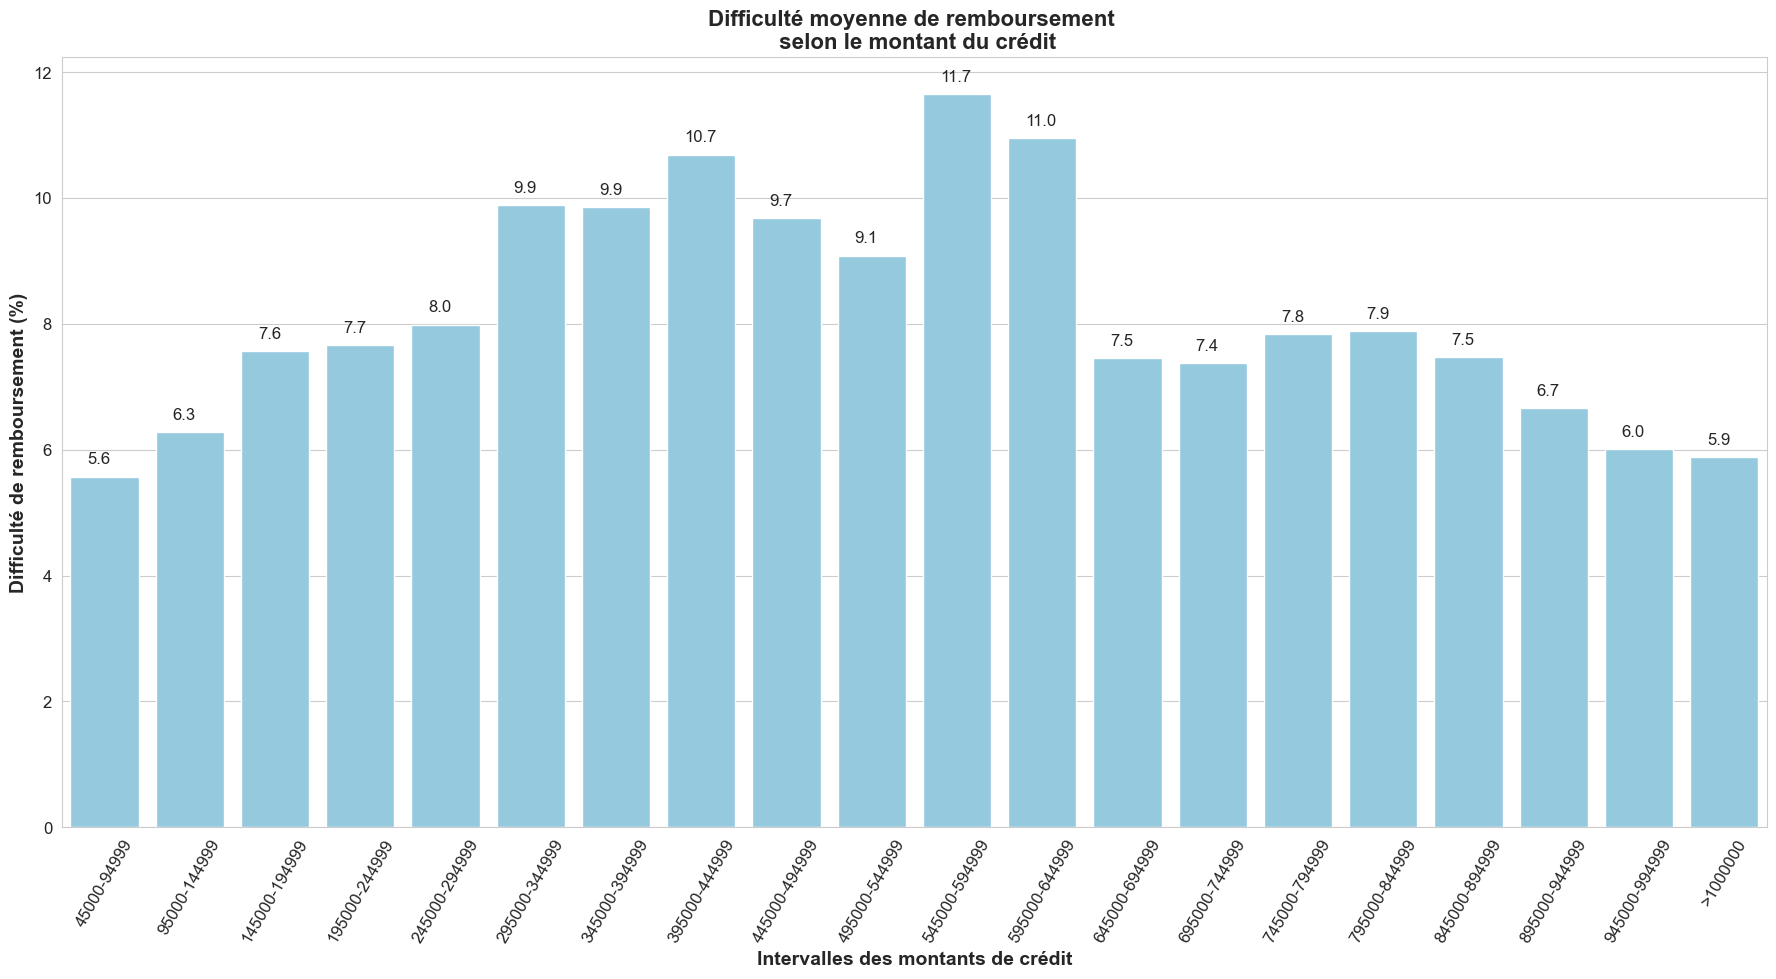

In [201]:
# Visualisation par histogramme
plt.figure(figsize = (22, 10))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = credit_groups, x= credit_groups.index.astype(str), y = credit_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Intervalles des montants de crédit", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement \n selon le montant du crédit", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
credit_total_nombre = credit_groups["TARGET"]*100
indices = credit_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.2, credit_total_nombre[idx]+0.2, round(credit_total_nombre[idx], 1))

plt.show()

**Difficulté de paiement selon le montant du crédit par rapport au revenu total du client (%) :**

In [202]:
df_datas_train["CREDIT_INCOME_PERC"] = (df_datas_train["AMT_CREDIT"] / df_datas_train["AMT_INCOME_TOTAL"])*100

In [203]:
# Création d'un dataframe
cred_revenu = df_datas_train[["TARGET", "CREDIT_INCOME_PERC"]]

# Génération des intervalles
bins = list(np.arange(0, 3050, 500))
bins.append(np.inf)

# Étiquettes pour chaque intervalle
labels = [f"{i}-{i+499}" for i in bins[:-2]] + ["> 3500"]

# Création de la la variable
cred_revenu['CRED_MONT_BINNED_BINNED'] = pd.cut(cred_revenu['CREDIT_INCOME_PERC'], bins=bins, labels=labels, right=False, include_lowest=True)
cred_revenu.head()

TARGET  CREDIT_INCOME_PERC CRED_MONT_BINNED_BINNED
SK_ID_CURR                                                    
100002         1.0          200.788889                   0-499
100003         0.0          479.075000                   0-499
100004         0.0          200.000000                   0-499
100006         0.0          231.616667                   0-499
100007         0.0          422.222222                   0-499

In [204]:
# Groupement par intervalle et calcul de la moyenne du montant versé périodiquement
cred_revenu_groups = cred_revenu.groupby('CRED_MONT_BINNED_BINNED').mean()
cred_revenu_groups

TARGET  CREDIT_INCOME_PERC
CRED_MONT_BINNED_BINNED                              
0-499                    0.083343          264.880970
500-999                  0.074955          669.232289
1000-1499                0.063500         1159.077061
1500-1999                0.079199         1668.867545
2000-2499                0.064865         2185.092346
2500-2999                0.142857         2687.419909
> 3500                   0.250000         3553.815784

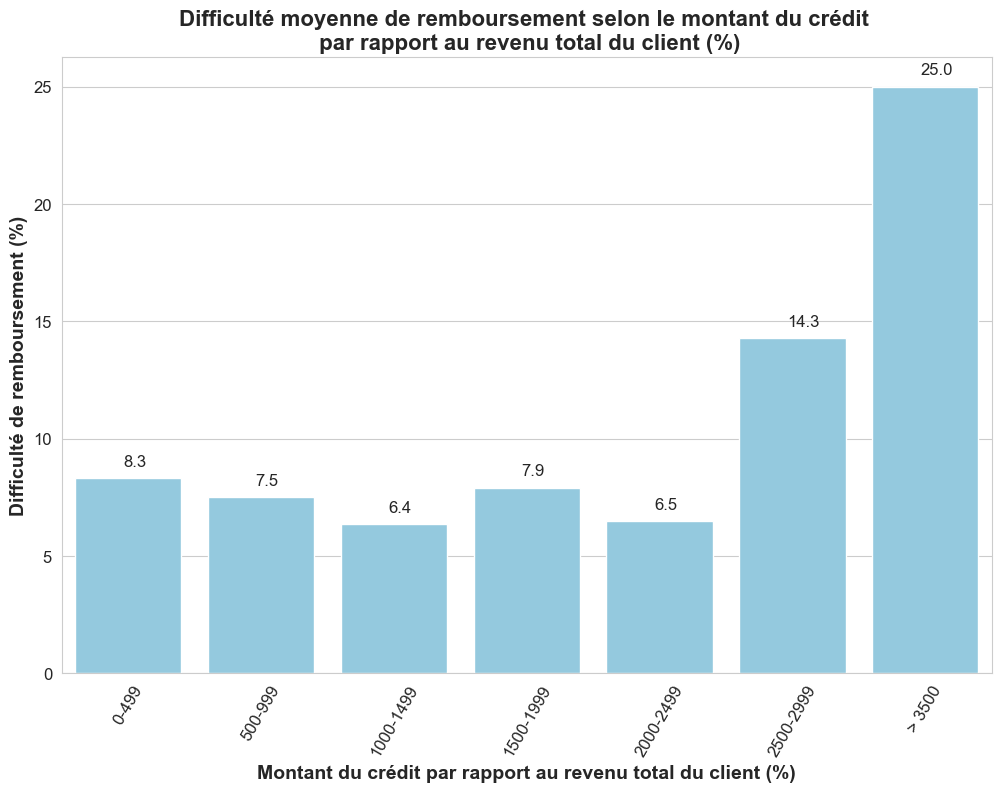

In [205]:
# Visualisation par histogramme
plt.figure(figsize = (12, 8))
plt.rcParams.update({"font.size" : 12})
sns.barplot(data = cred_revenu_groups, x= cred_revenu_groups.index.astype(str), y = cred_revenu_groups["TARGET"]*100, color="skyblue")
plt.xticks(rotation = 60)
plt.xlabel("Montant du crédit par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.ylabel('Difficulté de remboursement (%)', fontname = "sans-serif", fontsize = 14, fontweight = "bold")
plt.title("Difficulté moyenne de remboursement selon le montant du crédit \n par rapport au revenu total du client (%)", fontname = "sans-serif", fontsize = 16, fontweight = "bold")
    
cred_revenu_nombre = cred_revenu_groups["TARGET"]*100
indices = cred_revenu_groups.index
for i, idx in enumerate(indices):
    plt.text(i-0.04, cred_revenu_nombre[idx]+0.5, round(cred_revenu_nombre[idx], 1))

plt.show()

Plus le montant du crédit est important par rapport aux revenus du client, plus ce dernier semble rencontrer des difficultés de remboursement.